## Analyzing House Prices in King County, WA

House prices 

In [1]:
library(arcgisbinding)
library(reticulate)
library(htmlwidgets)
library(IRdisplay)
library(leaflet.esri)
library(leaflet)

*** Please call arc.check_product() to define a desktop license.
Loading required package: leaflet
Loading required package: leaflet.extras


In [2]:
arc.check_product()

product: ArcGIS Pro ( 12.5.0.21044 )
license: Advanced 
version: 1.0.1.232

In [3]:
GIS <- import("arcgis")

In [4]:
#### Read a Feature Service that Contains King County Housing Data
feature_service <- 'https://services3.arcgis.com/oZfKvdlWHN1MwS48/arcgis/rest/services/King_County_House_Prices/FeatureServer/0'
arc.fs <- arc.open(feature_service)
house.price <- arc.select( arc.fs)
house.price.sf <- arc.data2sf(house.price)
census.tract.API <- 'https://gisdata.kingcounty.gov/arcgis/rest/services/OpenDataPortal/census__blocks10_area/MapServer/858'
arc.census <- arc.open(census.tract.API)
census.data <- arc.select(arc.census)

Linking to GEOS 3.6.1, GDAL 2.2.3, proj.4 4.9.3
Warning message:
"plotting the first 9 out of 23 attributes; use max.plot = 23 to plot all"

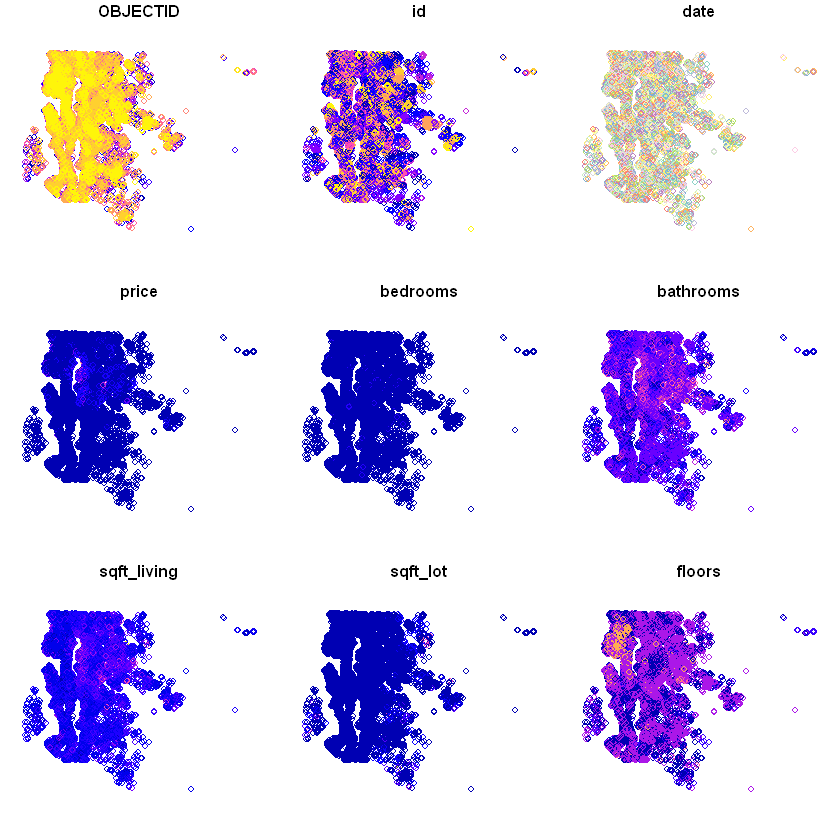

In [18]:
library(sf)
house.price.sf <- arc.data2sf(house.price)
plot(house.price.sf)

Installing package into 'C:/Users/orhu8849/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
also installing the dependencies 'MASS', 'e1071', 'class', 'DBI', 'units', 'classInt'

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'MASS' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked
package 'class' successfully unpacked and MD5 sums checked
package 'DBI' successfully unpacked and MD5 sums checked
package 'units' successfully unpacked and MD5 sums checked
package 'classInt' successfully unpacked and MD5 sums checked
package 'sf' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\orhu8849\AppData\Local\Temp\2\RtmpKaInhk\downloaded_packages


In [19]:
### Explore King County House Sale Data Interactively
m<- leaflet() %>%
  addEsriBasemapLayer(esriBasemapLayers$Streets) %>%
  setView(-122.300, 47.575, 10) %>%
  addEsriFeatureLayer(
    url='http://services3.arcgis.com/oZfKvdlWHN1MwS48/arcgis/rest/services/King_County_Housing_Prices_Subset/FeatureServer/0',
    useServiceSymbology = TRUE,
    labelProperty = 'price', labelOptions=labelOptions(textsize = '12px'),
    popupProperty = JS("function(feature) { return L.Util.template('<h3>King County House Sales</h3><hr /><p>This house located in zip code {zipcode} was sold for ${price}.', feature.properties);}"))

saveWidget(m, 'demo.html', selfcontained = FALSE)
display_html('<iframe src="demo.html" width=800, height=600></iframe>')

In [2]:
install.packages("hpiR")

Installing package into 'C:/Users/orhu8849/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"unable to access index for repository https://mran.microsoft.com/snapshot/2018-08-01/src/contrib:
  cannot open destfile 'C:\Users\orhu8849\AppData\Local\Temp\2\RtmpoDgOSc\file4cfac79cc302', reason 'No such file or directory'"Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/src/contrib:
  cannot open destfile 'C:\Users\orhu8849\AppData\Local\Temp\2\RtmpoDgOSc\file4cfac136312cc', reason 'No such file or directory'"Warning message:
"package 'hpiR' is not available (for R version 3.5.1)"Warning message in gzfile(file, mode):
"cannot open compressed file 'C:\Users\orhu8849\AppData\Local\Temp\2\RtmpoDgOSc/libloc_196_bcd3433f.rds', probable reason 'No such file or directory'"

ERROR: Error in gzfile(file, mode): cannot open the connection
